#### Necessary Libraries



In [ ]:
import pandas as pd

#### Loading the datasets

In [ ]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X = train_data.drop(columns=['Survived','Ticket', 'PassengerId', 'Cabin','Name'])

In [ ]:
y = train_data['Survived']

#### Imputation (Fill in missing values)

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
X.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
imp_numerical = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imp_numerical.fit(X[['Age']])

SimpleImputer()

In [ ]:
X['Age'] = imp_numerical.transform(X[['Age']])

In [ ]:
X['Age'].isna().sum()

0

In [ ]:
X['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
imp_categorical = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

In [ ]:
imp_categorical.fit(X[['Embarked']])

SimpleImputer(strategy='most_frequent')

In [ ]:
X['Embarked'] = imp_categorical.transform(X[['Embarked']]).ravel()

In [ ]:
X['Embarked'].isna().sum()

0

#### Standardization and Scaling
##### Three ways to do it: Standard Scaler, Minmax Scaler and Robust Scaler


In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

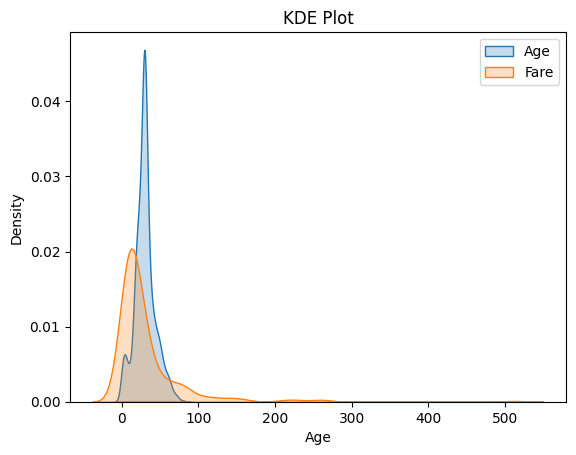

In [ ]:
sns.kdeplot(X['Age'], fill=True, label='Age')
sns.kdeplot(X['Fare'], fill=True, label='Fare')

# Set labels and title
# plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.legend()
# Display the KDE plot
plt.show()

In [ ]:
# import scipy.stats as stats
# stats.probplot(X['Fare'], dist="norm", plot=plt)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
standardScaler = StandardScaler()

In [ ]:
standardScaler.fit(X[['Age']])

StandardScaler()

In [ ]:
X['Age'] = standardScaler.transform(X[['Age']])

In [ ]:
X['Age']

0     -0.592481
1      0.638789
2     -0.284663
3      0.407926
4      0.407926
         ...   
886   -0.207709
887   -0.823344
888    0.000000
889   -0.284663
890    0.177063
Name: Age, Length: 891, dtype: float64

In [ ]:
minmaxScaler = MinMaxScaler()

In [ ]:
minmaxScaler.fit(X[['Fare']])
X['Fare'] = minmaxScaler.transform(X[['Fare']])

In [ ]:
X['Fare']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64

#### Encoding the categorical values
#### Two ways: Ordinal and OneHotEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
ordinal = OrdinalEncoder()

In [ ]:
X['Sex'] = ordinal.fit_transform(X[['Sex']])

In [ ]:
onehot = OneHotEncoder(sparse_output=True)

In [ ]:
embarked = onehot.fit_transform(X[['Embarked']])

In [ ]:
feature_names = onehot.get_feature_names_out()

In [ ]:
feature_names

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [ ]:
embarked_df = pd.DataFrame(embarked.toarray(), columns=feature_names)

In [ ]:
embarked_df

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [ ]:
X = pd.concat([X, embarked_df],axis=1).drop(columns=['Embarked'])

#### Combining and Pipelining

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X_pipeline = train_data.drop(columns=['Survived','Ticket', 'PassengerId', 'Cabin','Name'])

In [ ]:
age_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

fare_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

embarked_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

sex_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('sex_transformer', sex_transformer, ['Sex']),
        ('age_transformer', age_transformer, ['Age']),
        ('fare_transformer', fare_transformer, ['Fare']),
        ('embarked_transformer', embarked_transformer, ['Embarked'])
    ],remainder='passthrough',)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

X_transformed = pipeline.fit_transform(X_pipeline)

In [ ]:
new_order = ['Sex','Age','Fare','Embarked_C', 'Embarked_Q',	'Embarked_S','Pclass', 'SibSp',	'Parch']

In [ ]:
pd.DataFrame(X_transformed,columns=new_order)

,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass,SibSp,Parch
0,1.0,-0.592481,0.014151,0.0,0.0,1.0,3.0,1.0,0.0
1,0.0,0.638789,0.139136,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,-0.284663,0.015469,0.0,0.0,1.0,3.0,0.0,0.0
3,0.0,0.407926,0.103644,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,0.407926,0.015713,0.0,0.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,1.0,-0.207709,0.025374,0.0,0.0,1.0,2.0,0.0,0.0
887,0.0,-0.823344,0.058556,0.0,0.0,1.0,1.0,0.0,0.0
888,0.0,0.000000,0.045771,0.0,0.0,1.0,3.0,1.0,2.0
889,1.0,-0.284663,0.058556,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,-0.592481,1,0,0.014151,0.0,0.0,1.0


## Do the same for the Dataset in link: https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset - [10 marks]